# Analysis of Wilson loop means
## Import
### Modules

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
sns.set_style("whitegrid")

### Data

In [5]:
data = pd.read_csv("../Output/SU3_24_24_24_48_6.2000_1000_PHB_4_OR_7_dp.csv")

In [6]:
data.head()

,R,T,Mean,Stdev
0,1,1,0.613544,0.000128
1,1,2,0.410083,0.000165
2,1,3,0.279302,0.000180
3,1,4,0.191193,0.000184
4,1,5,0.131049,0.000184


## Plotting
### W(R,T)

In [7]:
def uncertRound(value, uncert):
    if uncert == 0:
        return value, uncert
    i = 0    
    while uncert*(10**i) <= 1:
        i += 1

    roundUncert = round(uncert, i)
    roundValue = round(value, i)
    if int(roundUncert) == roundUncert:
        roundUncert = int(roundUncert)
        roundValue = int(roundValue)
    return roundValue, roundUncert

In [8]:
def exponenial_func(x, a, b, c):
    return a*np.exp(-b*x)+c

In [52]:
def plotW(data, logy=False):
    fits = {}
    
    with sns.color_palette('tab20', len(set(data['R']))):
        fig = plt.figure(figsize=(16,8))
        for i, r in enumerate(list(set(data['R']))):
            #Scatter
            x = data.loc[data.R == r, 'T']
            y = data.loc[data.R == r, 'Mean']
            err = data.loc[data.R == r, 'Stdev']
            plt.errorbar(x, y, yerr=err, fmt='o', color=sns.color_palette()[i], label='')
            
            #Exp fit
            fit, conv = curve_fit(exponenial_func, x, y, p0=(0.5, 1, 0.001), sigma=err)
            xx = np.linspace(np.min(x), np.max(x), 1000)
            yy = exponenial_func(xx, *fit)
            fits[r] = (fit, conv)
            
            #Uncertainty
            coef = []
            unc = np.sqrt(np.diag(conv))
            for j in range(len(fit)):
                coef.append(uncertRound(fit[j], unc[j]))
                
            plt.plot(xx, yy, color=sns.color_palette()[i],
                     label='W({},T) = {}±{} x exp({}±{} x T) + {}±{}'.format(r,
                                                                             coef[0][0], coef[0][1],
                                                                             coef[1][0], coef[1][1],
                                                                             coef[2][0], coef[2][1],))

        plt.legend(loc='best', fontsize=16)
        plt.xticks(fontsize=16, color='black')
        plt.yticks(fontsize=16, color='black')
        plt.ylabel("W(R,T)", fontsize=24, color='black')
        plt.xlabel('T', fontsize=24, color='black')
        if logy: plt.yscale('log')
        plt.show()
    return fits

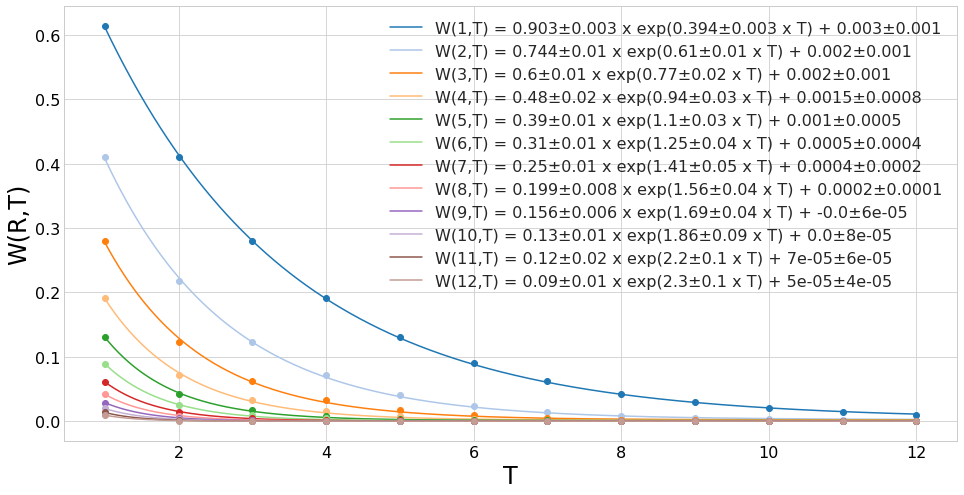

In [53]:
expFits = plotW(data)

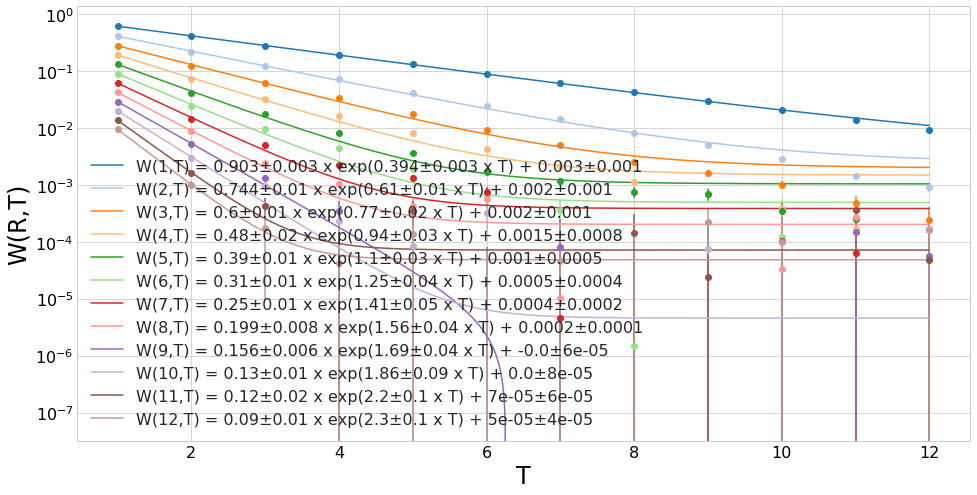

In [54]:
plotW(data, True);

### V(R)

In [44]:
def const_func(x, a):
    return np.ones_like(x)*a

In [57]:
def plotV(data):
    with sns.color_palette('tab20', len(set(data['R']))):
        fits = {}
        for i, r in enumerate(list(set(data['R']))):
            fig = plt.figure(figsize=(16,8))

            #scatter
            x = data.loc[(data.R == r) & (data['T'] > 2), 'T'].values[:-1]
            w = data.loc[(data.R == r) & (data['T'] > 2), 'Mean'].values
            err = data.loc[(data.R == r) & (data['T'] > 2), 'Stdev'].values
            y = np.log([w[j]/w[j+1] for j in range(len(w)-1)])

            #Nan removal
            skimX = []
            skimY = []
            skimErr = []
            for e in range(len(y)):
                if y[e] == y[e]:
                    skimX.append(x[e])
                    skimY.append(y[e])
                    skimErr.append(err[e])

            #plt.plot(skimX, skimY, 'o', label='', color=sns.color_palette()[i])
            plt.errorbar(skimX, skimY, yerr=skimErr, fmt='o', color=sns.color_palette()[i], label='')

            #constant fit
            fit, conv = curve_fit(const_func, skimX, skimY, p0=(0.5), sigma=skimErr)
            xx = np.linspace(np.min(skimX), np.max(skimX), 1000)
            yy = const_func(xx, *fit)
            coef = uncertRound(fit[0], np.sqrt(np.diag(conv))[0])
            plt.plot(xx, yy, label=r'$V(' + str(r) + r')=' + str(coef[0]) + r'\pm' + str(coef[1]) + r'$',
                     color=sns.color_palette()[i])

            fits[r] = (fit, conv)

            plt.legend(loc='best', fontsize=16)
            plt.xticks(fontsize=16, color='black')
            plt.yticks(fontsize=16, color='black')
            plt.ylabel("V(R)", fontsize=24, color='black')
            plt.xlabel('T', fontsize=24, color='black')
            plt.show()

    return fits

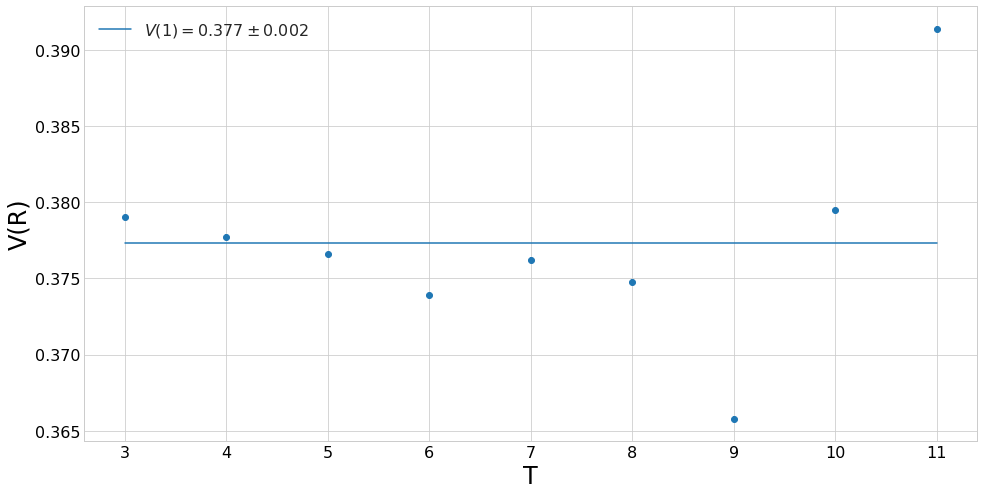

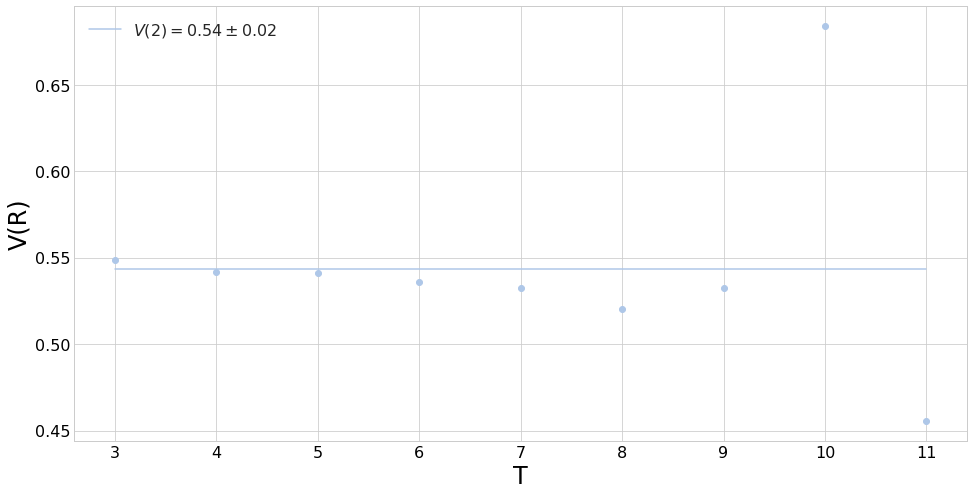

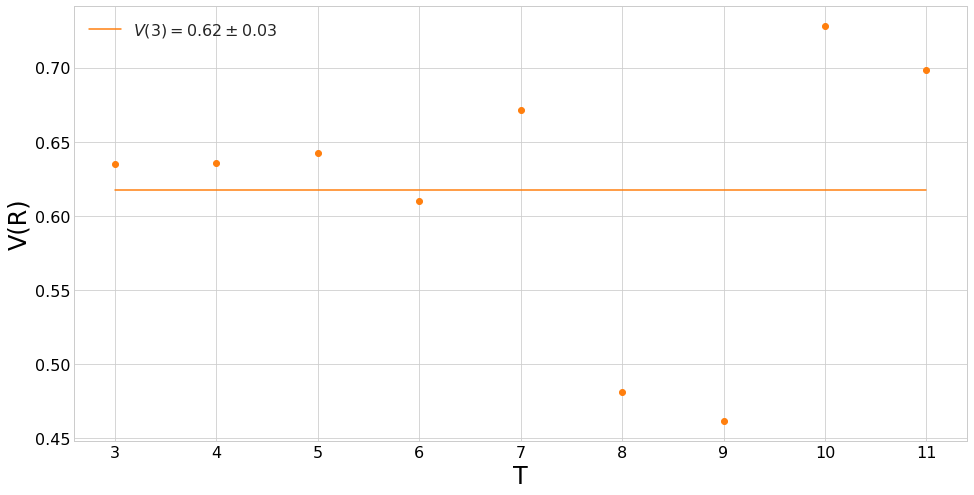

/home/giles/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


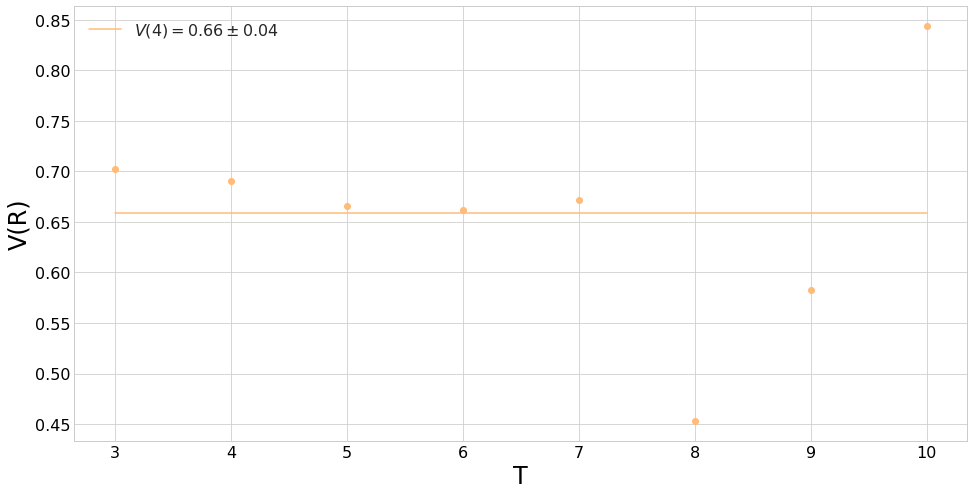

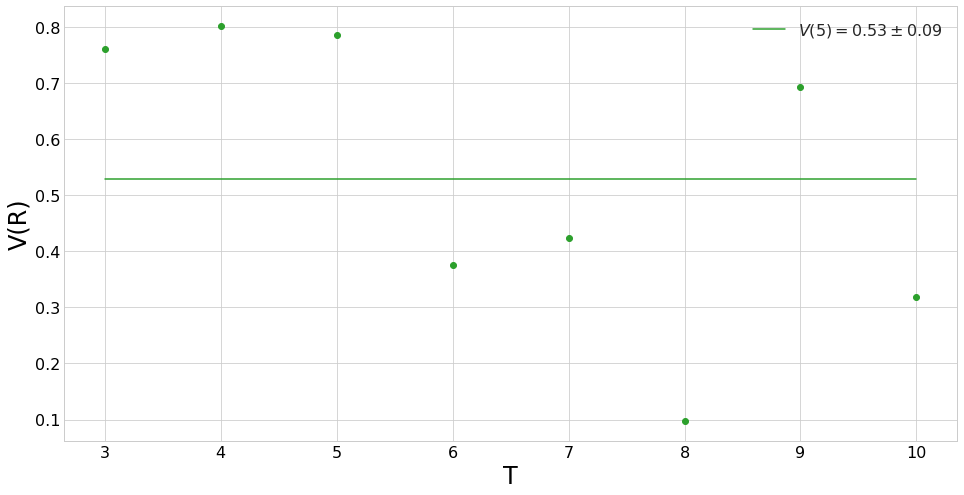

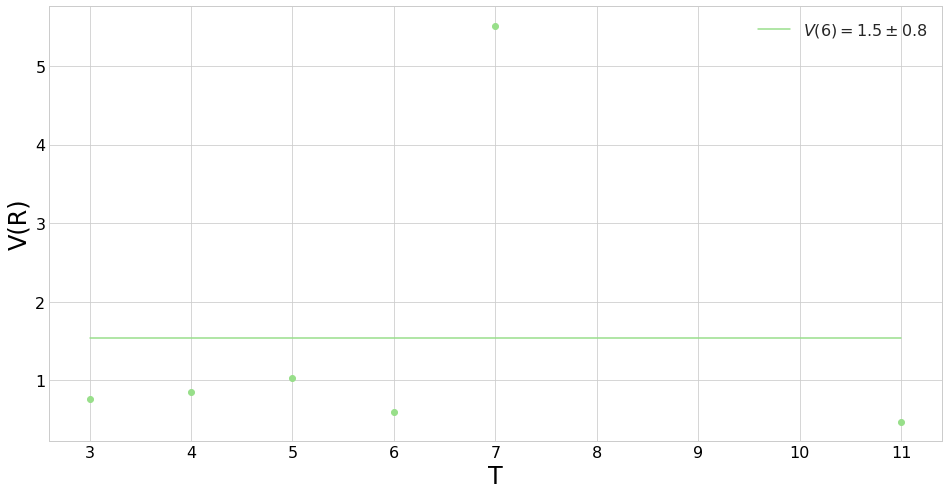

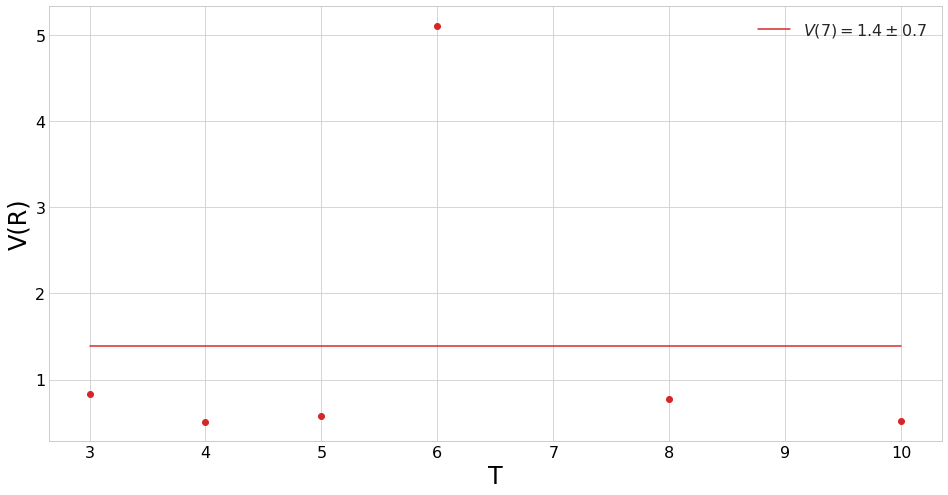

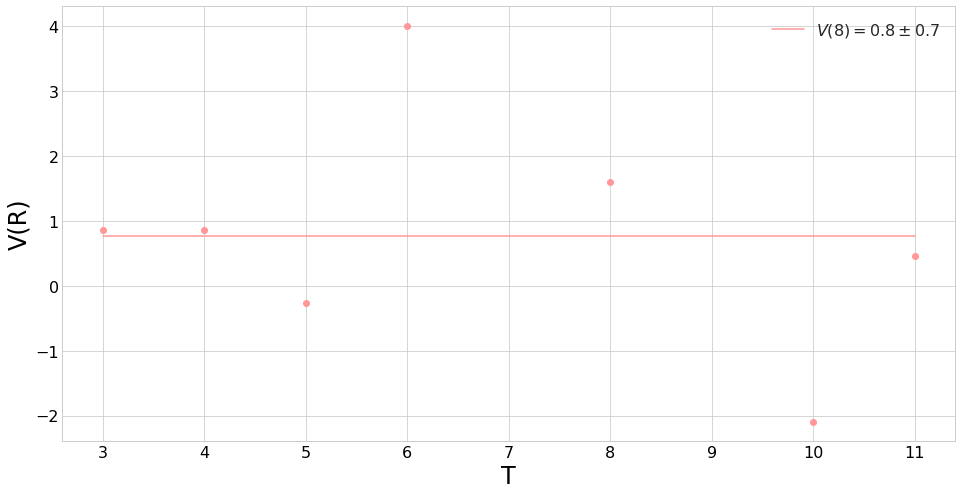

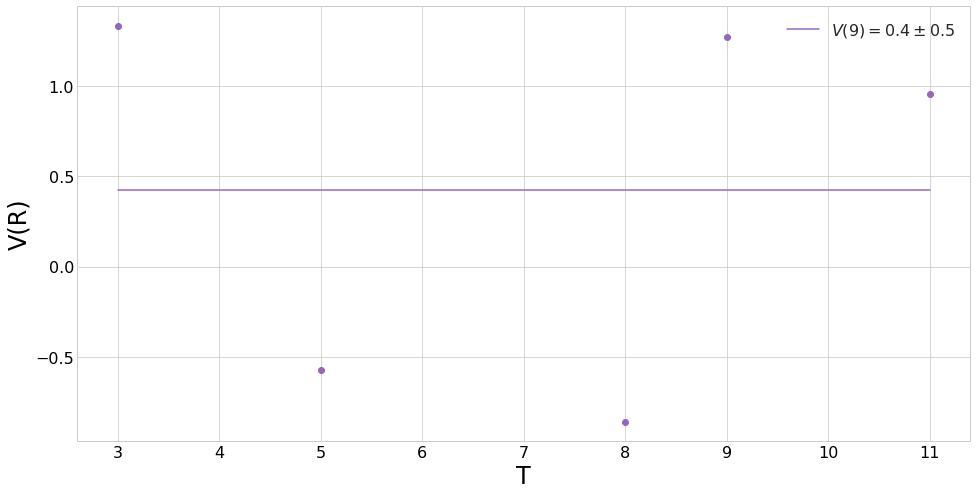

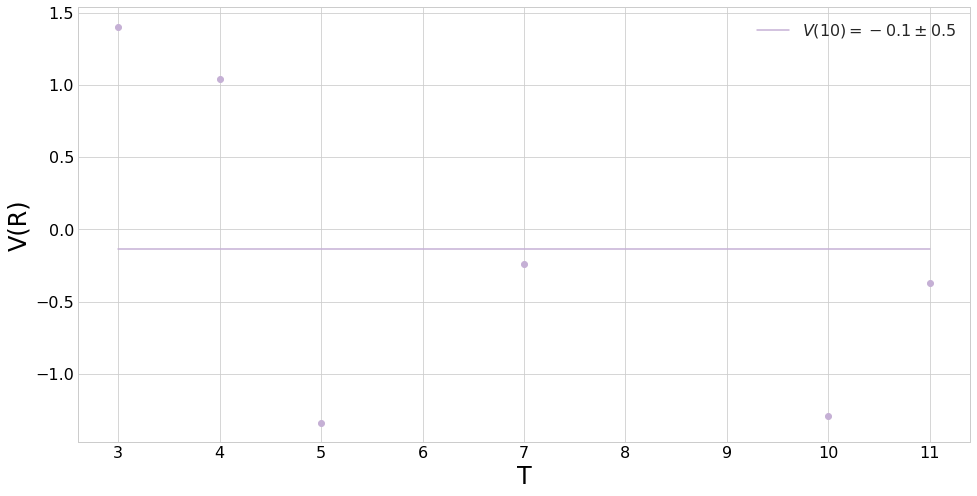

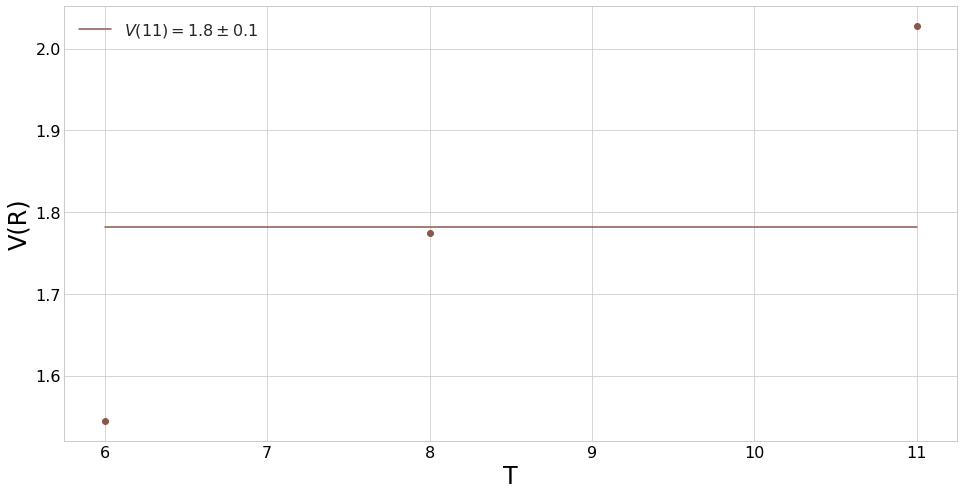

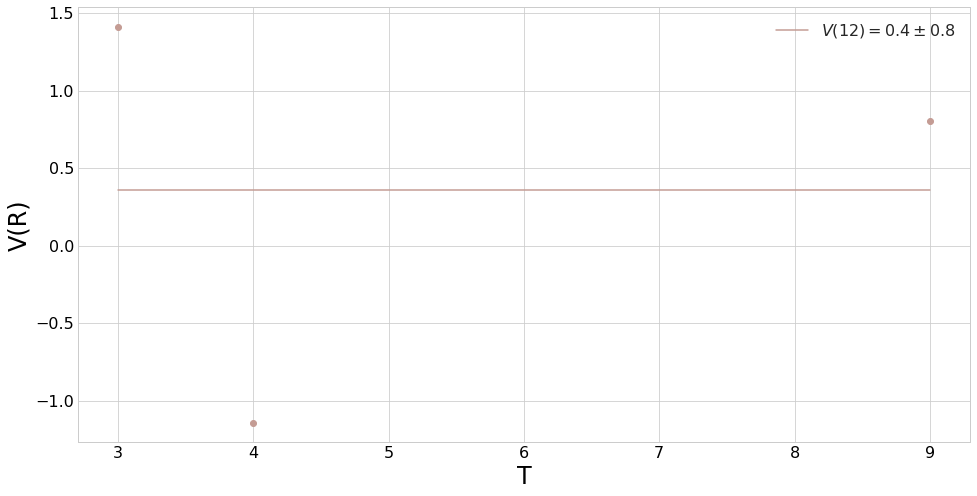

In [58]:
constFits = plotV(data)